In [15]:
!pip install git+https://github.com/aayushwadhwa/cleverhans.git
!pip install git+https://github.com/nottombrown/imagenet_stubs

  Cloning https://github.com/aayushwadhwa/cleverhans.git to /tmp/pip-req-build-t3g2zbx3
  Running command git clone -q https://github.com/aayushwadhwa/cleverhans.git /tmp/pip-req-build-t3g2zbx3
  Cloning https://github.com/nottombrown/imagenet_stubs to /tmp/pip-req-build-818pq6h4
  Running command git clone -q https://github.com/nottombrown/imagenet_stubs /tmp/pip-req-build-818pq6h4


In [16]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt

#Importing cleverhans and its attack method
import cleverhans
from cleverhans.tf2.attacks.deep_fool import deep_fool_attack

# Tensorflow and ResNet50 Imports
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load Imagenet Stubs
import imagenet_stubs
from imagenet_stubs.imagenet_2012_labels import name_to_label, label_to_name

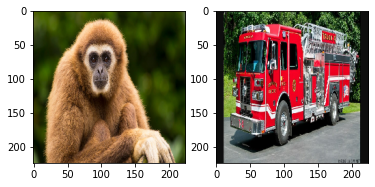

In [17]:
# img_path = tf.keras.utils.get_file('Panda', origin= 'https://pbs.twimg.com/profile_images/829274786362699776/a1ttXfVG.jpg')
img_path = tf.keras.utils.get_file('Gibbon', origin= 'https://www.sciencenews.org/wp-content/uploads/2020/09/090820_bb_gibbon_feat-1028x579.jpg')

img_1 = image.load_img(img_path, target_size=(224, 224))
x_img_1 = image.img_to_array(img_1)
x_img_1 = np.expand_dims(x_img_1, axis=0)

img_path = tf.keras.utils.get_file('Fire Truck', origin= 'https://bloximages.chicago2.vip.townnews.com/poststar.com/content/tncms/assets/v3/editorial/0/8f/08f0b7c6-3c09-52e1-931e-b77d0b0aa3ad/5a733112d2d0f.image.jpg?resize=1200%2C494')
img_2 = image.load_img(img_path, target_size=(224, 224))
x_img_2 = image.img_to_array(img_2)
x_img_2 = np.expand_dims(x_img_2, axis=0)



x_img = np.vstack((x_img_1, x_img_2))

f = plt.figure()
ax1 = f.add_subplot(1,2,1)
ax1.imshow(img_1)
ax2 = f.add_subplot(1,2,2)
ax2.imshow(img_2)

In [18]:
resnet = ResNet50(weights='imagenet')

In [19]:
pred = resnet.predict(x_img)
labels = np.argmax(pred, axis=1)

for i in range(labels.shape[0]):
  label = labels[i]
  confidence = pred[:,label][i]
  print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))

Prediction: gibbon, Hylobates lar - confidence 0.65
Prediction: fire engine, fire truck - confidence 0.61


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


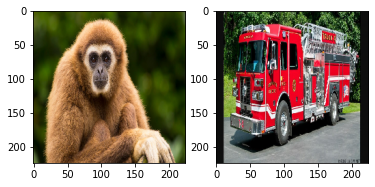

In [20]:
df, noise = deep_fool_attack(resnet, x_img)

f = plt.figure()
ax1 = f.add_subplot(1,2,1)
ax1.imshow(df[0]/255)
ax2 = f.add_subplot(1,2,2)
ax2.imshow(df[1]/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


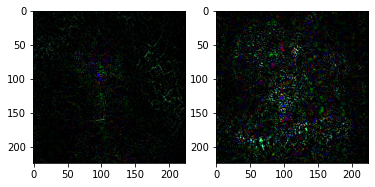

In [21]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
ax1.imshow(noise[0])
ax2 = f.add_subplot(1,2,2)
ax2.imshow(noise[1])

In [22]:
pred = resnet.predict(df)
labels = np.argmax(pred, axis=1)

for i in range(labels.shape[0]):
  label = labels[i]
  confidence = pred[:,label][i]
  print('Prediction:', label_to_name(label), '- confidence {0:.2f}'.format(confidence))

Prediction: gorilla, Gorilla gorilla - confidence 0.39
Prediction: garbage truck, dustcart - confidence 0.17
